### Implementing simple Chatbot Using LangGraph

In [2]:
from typing_extensions import TypedDict
from langgraph.graph import START, END, StateGraph

from typing import Annotated
from langgraph.graph.message import add_messages


In [ ]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [5]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

load_dotenv()

os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')

llm = ChatOpenAI(
    model='gpt-5-mini-2025-08-07'
)

In [6]:
def superbot(state:State):
    return {"messages": [llm.invoke(state['messages'])]}

In [7]:
graph = StateGraph(State)

graph.add_node("SuperBot", superbot)

graph.add_edge(START, "SuperBot")

graph.add_edge("SuperBot", END)

graph_builder = graph.compile()


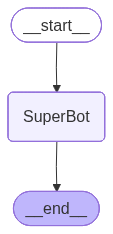

In [8]:
from IPython.display import display, Image

display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [9]:
graph_builder.invoke({'messages': "Hi My name is Suriyaa and I am a management consultant who is aspiring to make a mark in AI"})

{'messages': [HumanMessage(content='Hi My name is Suriyaa and I am a management consultant who is aspiring to make a mark in AI', additional_kwargs={}, response_metadata={}, id='8f545da6-0f72-4534-9fcc-a81945543a1a'),
  AIMessage(content='Nice to meet you, Suriyaa — and congrats on choosing a powerful direction. As a management consultant, you already have high-value skills (problem framing, stakeholder management, ROI thinking) that map very well into AI-enabled transformations. I can help you with a tailored plan, learning resources, project ideas, resume/LinkedIn wording, or a go-to-market approach for AI consulting. To start, here are practical, high-impact steps and resources you can use right away.\n\nQuick questions so I can personalize this:\n- What’s your technical background (programming, data analytics, statistics)?\n- Which industries or clients do you currently work with/want to focus on?\n- Do you want to be a strategy-focused AI advisor, a hands-on implementer, or both?\

#### Streaming The responses

In [ ]:
for event in graph_builder.stream({'messages': "Hi My name is Suriyaa and I am a management consultant who is aspiring to make a mark in AI"}, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello my name is Suriyaa', additional_kwargs={}, response_metadata={}, id='3cf4180f-b3c5-4ed7-bd44-ebc1472b799b')]}
{'messages': [HumanMessage(content='Hello my name is Suriyaa', additional_kwargs={}, response_metadata={}, id='3cf4180f-b3c5-4ed7-bd44-ebc1472b799b'), AIMessage(content='Hello Suriyaa — nice to meet you! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 90, 'prompt_tokens': 13, 'total_tokens': 103, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 64, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-5-mini-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CIfOBIUYEADPtWa2Nxx0nWcHXMprR', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--08164236-2981-47de-b100-517f174eea00-0', usage_metadata={'input_tokens': 13